<a href="https://colab.research.google.com/github/SergeyAnufriev/CFD_unet/blob/main/notebooks/Mesh_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf /content/CFD_unet
!git clone https://github.com/SergeyAnufriev/CFD_unet.git

Cloning into 'CFD_unet'...
remote: Enumerating objects: 598, done.
remote: Counting objects: 100% (598/598), done.
remote: Compressing objects: 100% (423/423), done.
remote: Total 598 (delta 232), reused 511 (delta 164), pack-reused 0
Receiving objects: 100% (598/598), 86.19 MiB | 4.50 MiB/s, done.
Resolving deltas: 100% (232/232), done.
Checking out files: 100% (305/305), done.


#This notebook investigates CFD simulation data


In [2]:
import pandas as pd
import glob
import sys 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sys.path.append('/content/CFD_unet')

In [4]:
files_c = glob.glob(r'/content/CFD_unet/dataset/*_c.txt')
files_n = glob.glob(r'/content/CFD_unet/dataset/*_n.txt')

In [5]:
len(files_n), len(files_c)

(99, 99)

In [6]:
def read_file_n(dir_):
  df = pd.read_csv(dir_,sep =' ',header=None)
  df = df.drop(labels=list(range(1, 15, 2)),axis=1)
  df.columns = ['node_num','node_type','x','y','P','u_x','u_y','cav']
  df = df.astype({"P": float, "cav": float})

  return df


In [7]:
df = read_file_n(files_n[17])

In [8]:
df.head(10)

,node_num,node_type,x,y,P,u_x,u_y,cav
0,0,2,0.115,0.000182,15996.0,0.00000,0.000000,1.0
1,1,1,0.500,0.250000,17102.4,1.96787,-0.365762,1.0
2,2,1,0.500,-0.250000,17106.0,1.93894,-0.380014,1.0
3,3,3,-0.500,-0.250000,17059.3,1.96634,-0.365705,1.0
4,4,3,-0.500,0.250000,17111.9,1.96629,-0.365679,1.0
5,10,1,0.500,0.230000,17101.5,1.97164,-0.365630,1.0
6,11,1,0.500,0.210000,17101.5,1.97808,-0.365503,1.0
7,12,1,0.500,0.190000,17101.5,1.98637,-0.365828,1.0
8,13,1,0.500,0.170000,17101.5,1.99354,-0.366142,1.0
9,14,1,0.500,0.150000,17101.5,1.99753,-0.365603,1.0


In [9]:
# All values seem to have the same number of points 

number_of_points = [len(read_file_n(files_n[x])) for x in range(len(files_n))]

pd.value_counts(number_of_points)

7420    99
dtype: int64

In [40]:
pd.value_counts([read_file_n(files_n[x])['x'].min() for x in range(len(files_n))])

-0.5    99
dtype: int64

In [41]:
pd.value_counts([read_file_n(files_n[x])['x'].max() for x in range(len(files_n))])

0.5    99
dtype: int64

In [42]:
pd.value_counts([read_file_n(files_n[x])['y'].min() for x in range(len(files_n))])

-0.25    99
dtype: int64

In [43]:
pd.value_counts([read_file_n(files_n[x])['y'].max() for x in range(len(files_n))])

0.25    99
dtype: int64

In [44]:
#### all files have the same x,y range

In [11]:
def range_(df,x,y):
  return len(df[(df['x']<x) & (df['x']>-x) & (df['y']>-y) & (df['y']<y)])/7420

(array([ 0.,  0.,  0.,  0.,  0., 99.,  0.,  0.,  0.,  0.]),
 array([-1.00269542e-01, -2.69541779e-04,  9.97304582e-02,  1.99730458e-01,
         2.99730458e-01,  3.99730458e-01,  4.99730458e-01,  5.99730458e-01,
         6.99730458e-01,  7.99730458e-01,  8.99730458e-01]),
 <a list of 10 Patch objects>)

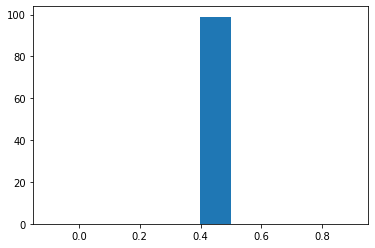

In [12]:
plt.hist([range_(read_file_n(files_n[x]),0.1,0.05) for x in range(len(files_n))])

In [13]:
df

,node_num,node_type,x,y,P,u_x,u_y,cav
0,0,2,0.115000,0.000182,15996.0,0.000000,0.000000,1.0
1,1,1,0.500000,0.250000,17102.4,1.967870,-0.365762,1.0
2,2,1,0.500000,-0.250000,17106.0,1.938940,-0.380014,1.0
3,3,3,-0.500000,-0.250000,17059.3,1.966340,-0.365705,1.0
4,4,3,-0.500000,0.250000,17111.9,1.966290,-0.365679,1.0
...,...,...,...,...,...,...,...,...
7415,7803,0,0.101868,-0.024973,16349.7,1.824720,-0.163392,1.0
7416,7804,0,0.056578,0.017905,16882.5,2.097490,-0.172321,1.0
7417,7805,0,0.097603,0.036696,16889.8,2.069760,-0.341369,1.0
7418,7806,0,0.125104,-0.018244,16516.4,0.396869,0.269093,1.0


Text(0.5, 1.0, 'u_y')

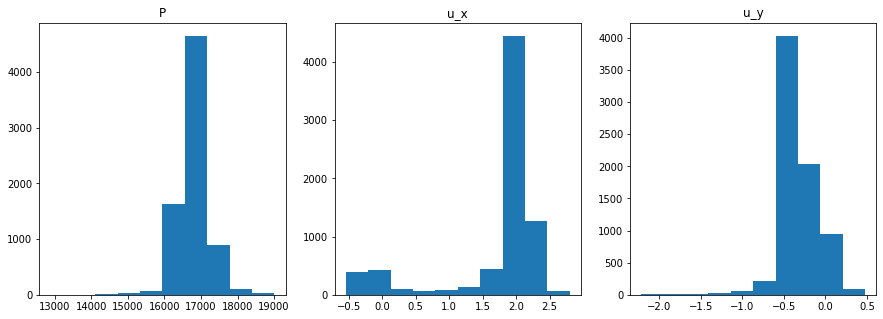

In [14]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))

axs[0].hist(df['P'].values)
axs[0].set_title('P')
axs[1].hist(df['u_x'].values)
axs[1].set_title('u_x')
axs[2].hist(df['u_y'].values)
axs[2].set_title('u_y')

In [15]:
def check_repeat_val(x:str)->int:
  '''Function checks the number of files with repeting values'''
  
  count = 0
  for file_ in files_n:
    df = read_file_n(file_)
    if len(df[x].value_counts()) <2000:
      count+=1

  return count

In [16]:
### all files do not have repeating values

check_repeat_val('P'), check_repeat_val('u_x'),check_repeat_val('u_y')

(0, 0, 0)

In [17]:
P_min   = [read_file_n(x)['P'].min() for x in files_n]
P_max   = [read_file_n(x)['P'].max() for x in files_n]
P_mean  = [read_file_n(x)['P'].mean() for x in files_n]

u_x_min  = [read_file_n(x)['u_x'].min() for x in files_n]
u_x_max  = [read_file_n(x)['u_x'].max() for x in files_n]
u_x_mean = [read_file_n(x)['u_x'].mean() for x in files_n]

u_y_min  = [read_file_n(x)['u_y'].min() for x in files_n]
u_y_max  = [read_file_n(x)['u_y'].max() for x in files_n]
u_y_mean = [read_file_n(x)['u_y'].mean() for x in files_n]

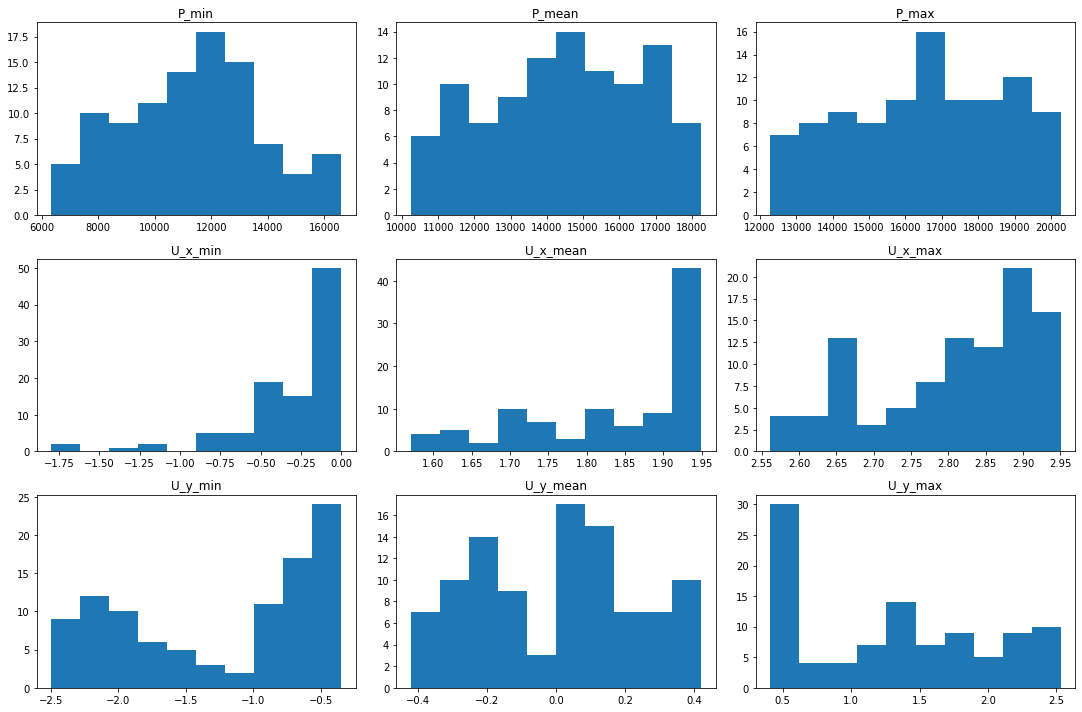

In [18]:
fig, axs = plt.subplots(3, 3,figsize=(15,10))


axs[0,0].hist(P_min)
axs[0, 0].set_title('P_min')
axs[0,1].hist(P_mean)
axs[0, 1].set_title('P_mean')
axs[0,2].hist(P_max)
axs[0, 2].set_title('P_max')

axs[1,0].hist(u_x_min)
axs[1, 0].set_title('U_x_min')
axs[1,1].hist(u_x_mean)
axs[1, 1].set_title('U_x_mean')
axs[1,2].hist(u_x_max)
axs[1, 2].set_title('U_x_max')

axs[2,0].hist(u_y_min)
axs[2, 0].set_title('U_y_min')
axs[2,1].hist(u_y_mean)
axs[2, 1].set_title('U_y_mean')
axs[2,2].hist(u_y_max)
axs[2, 2].set_title('U_y_max')

plt.tight_layout()

In [19]:
# Install required packages.
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git


     |████████████████████████████████| 7.9 MB 2.2 MB/s 
     |████████████████████████████████| 3.5 MB 4.6 MB/s 


In [20]:
from torch_geometric.data import DataLoader
from data_ import dataset_graph_,velocities_cav
import torch
import glob
from torch_geometric.utils import to_networkx
import networkx as nx

In [21]:
dir_    = r'/content/CFD_unet/dataset/*txt'
dataset = dataset_graph_(dir_)

In [ ]:
len(dataset)

99

In [22]:
dataset.split_by = '/'

In [24]:
def range_(df,x,y):
  return len(df[(df['x']<x) & (df['x']>-x) & (df['y']>-y) & (df['y']<y)])/7420

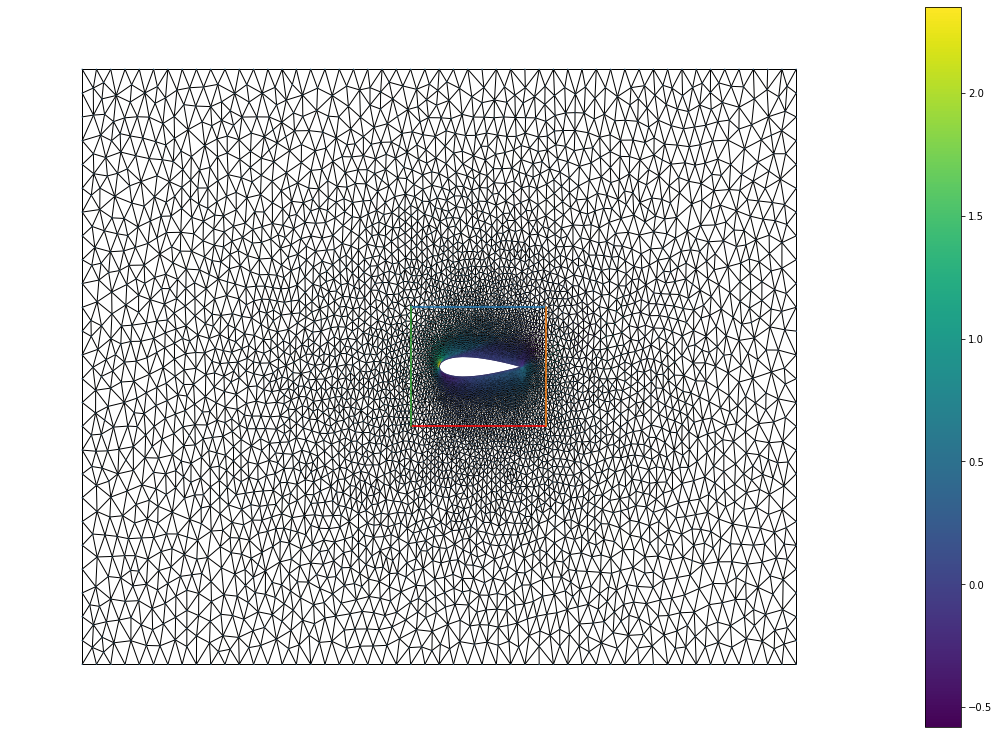

In [52]:
graph ,X_out  = dataset.get(0)

X_feat  = graph.x[:,:2]


pos_    =  {x:(float(X_feat[x,0].numpy()),float(X_feat[x,1].numpy())) for x in range(len(X_feat))}


g = to_networkx(graph,to_undirected=True)

plt.figure(figsize=(15,10))

colors = X_out[:,2].numpy()

cmap=plt.cm.viridis
vmin = min(colors)
vmax = max(colors)

nx.draw(g,pos=pos_, with_labels=False,node_size=0.1,node_color=colors, vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)

dx = 0.1
dy = -0.05

plt.plot(np.linspace(-0.04,0.15,10),[dy]*10,c='r')
plt.plot(np.linspace(-0.04,0.15,10),[-dy]*10)
plt.plot([0.15]*10,np.linspace(-dy,dy,10))
plt.plot([-0.04]*10,np.linspace(-dy,dy,10))
plt.show()

In [48]:
def range2(df):
  return len(df[(df['x']<0.15) & (df['x']>-0.4) & (df['y']<0.05) & (df['y']>-0.05) ])/len(df)

n_points = [range2(read_file_n(files_n[x])) for x in range(len(files_n))]

In [50]:
pd.value_counts(n_points)

0.559299    99
dtype: int64

In [51]:
### In all files 56% of nodes lie inside rectangle 

In [53]:
cond_inside_rectangle = (df['x']<0.15) & (df['x']>-0.4) & (df['y']<0.05) & (df['y']>-0.05) 